In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
student_data = pd.read_csv('dataset.csv')

In [3]:
# check the shape of the data set(no. of rows and columns )
student_data.shape

(4424, 35)

In [4]:
# check the columns name
student_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [5]:
# check how data looks
student_data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
# check the data mathematically
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
# check if there are null values
print(student_data.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [8]:
student_data = student_data[['Mother\'s occupation', 'Father\'s occupation','Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Target']]


In [9]:
student_data['Target']

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

In [10]:
# check the target
student_data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [11]:
# chenge the target value in to numarical
student_data['Target'] = student_data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [12]:
# chech if Target colunm filled with 0,1 and 2
student_data

,Mother's occupation,Father's occupation,Debtor,Tuition fees up to date,Scholarship holder,Target
0,6,10,0,1,0,0
1,4,4,0,0,0,2
2,10,10,0,0,0,0
3,6,4,0,1,0,2
4,10,10,0,1,0,2
...,...,...,...,...,...,...
4419,6,5,0,1,0,2
4420,10,10,1,0,0,0
4421,10,10,0,1,1,0
4422,8,5,0,1,1,2


In [13]:
# Extract Input & Output Columns
x = student_data.iloc[:,0:5]
y = student_data.iloc[:,-1]


#Splitting the data into Training & Testing Data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
# check the shapes of the splitted data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 5)
(885, 5)
(3539,)
(885,)


In [15]:
from sklearn.svm import SVC

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model using the selected variables as input features and the "Target" column as the target variable
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=100)
svm.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [16]:
# Evaluate the model's performance using the testing set and appropriate metrics
y_pred = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6
Precision: 0.5234480338105615
Recall: 0.6
F1 score: 0.5233020499034154


Accuracy score:  0.6
              precision    recall  f1-score   support

           0       0.38      0.71      0.49       152
           1       0.00      0.00      0.00         1
           2       0.94      0.58      0.72       732

    accuracy                           0.60       885
   macro avg       0.44      0.43      0.40       885
weighted avg       0.84      0.60      0.68       885



Text(113.9222222222222, 0.5, 'predicted label')

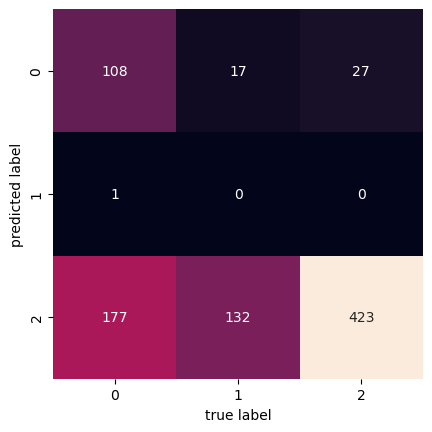

In [17]:
# Displaying the accuracy score and report with precison, recall and f1-scores
print('Accuracy score: ',accuracy_score(y_test,y_pred))

print(classification_report(y_pred, y_test))


# Displaying the results in a confusion matrix to identify where more data may be needed
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
# Define the parameter distributions to search over
param_distributions = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.arange(0.01, 1, 0.01)),
}

# Create the RandomizedSearchCV object with 5-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(svm, param_distributions, n_iter=100, cv=5)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found by RandomizedSearchCV
print('Best hyperparameters:', random_search.best_params_)

C = random_search.best_params_['C']
G = random_search.best_params_['gamma']
K = random_search.best_params_['kernel']

In [ ]:
# check the accuracy again with RandomizedSearchCV generated values
svm = SVC(C=C,gamma=G,kernel=K)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))